# **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import seaborn as sns
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose # Error Trend Seasonality decomposition

# holt winters
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   # single exponential smoothing as in ewm of pandas
from statsmodels.tsa.holtwinters import ExponentialSmoothing # double and triple exponential smoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

import statsmodels.tsa.holtwinters     as      ets
import statsmodels.tools.eval_measures as      fa
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.holtwinters     import  SimpleExpSmoothing
!pip install darts
from darts.utils.statistics import check_seasonality
from darts.timeseries import TimeSeries

# **Fungsi Perhitungan Mape**

In [ ]:
def mape(actual, pred):
  actual, pred = np.array(actual), np.array(pred)
  return np.mean(np.abs((actual - pred) / actual)) * 100

# **Bawang Merah**

In [ ]:
merah = pd.read_excel('/content/Fix_Bawang Merah (1)_coba.xlsx')
merah

,Tanggal,Harga,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,02/ 01/ 2018,19650,NaN,NaN,NaN
1,03/ 01/ 2018,19600,NaN,NaN,NaN
2,04/ 01/ 2018,19550,NaN,NaN,NaN
3,05/ 01/ 2018,19450,NaN,NaN,NaN
4,08/ 01/ 2018,20100,NaN,NaN,NaN
...,...,...,...,...,...
1429,26/ 06/ 2023,36500,NaN,NaN,NaN
1430,27/ 06/ 2023,36450,NaN,NaN,NaN
1431,28/ 06/ 2023,36450,NaN,NaN,NaN
1432,29/ 06/ 2023,36450,NaN,NaN,NaN


In [ ]:
nobs = len(merah)
dates = pd.date_range('2018-01-02', freq = "D", periods = nobs)
merah.index = pd.Index(dates)

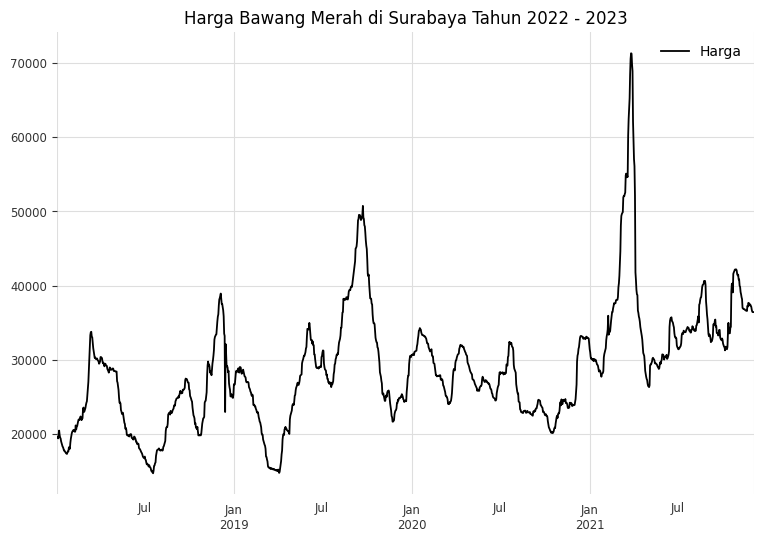

In [ ]:
#Plot the output
#We expect to see the close green line aligned to the blue line.
merah[['Harga']].plot(figsize=(9, 6));
plt.title('Harga Bawang Merah di Surabaya Tahun 2022 - 2023')

plt.grid(True)
plt.legend()

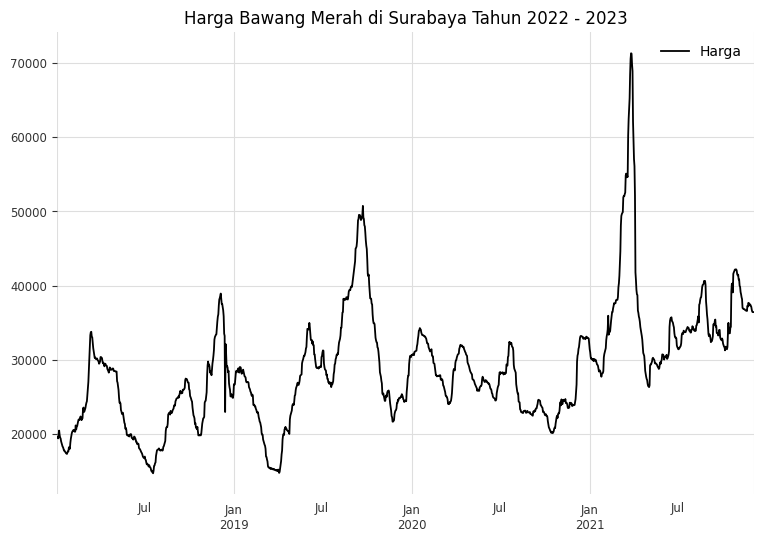

In [ ]:
#Plot the output
#We expect to see the close green line aligned to the blue line.
merah[['Harga']].plot(figsize=(9, 6));
plt.title('Harga Bawang Merah di Surabaya Tahun 2022 - 2023')

plt.grid(True)
plt.legend()

In [ ]:
print(type(merah['Harga'][0]))

<class 'numpy.int64'>


In [ ]:
print(merah['Harga'])

2018-01-02    19650
2018-01-03    19600
2018-01-04    19550
2018-01-05    19450
2018-01-06    20100
              ...  
2021-12-01    36500
2021-12-02    36450
2021-12-03    36450
2021-12-04    36450
2021-12-05    36450
Freq: D, Name: Harga, Length: 1434, dtype: int64


In [ ]:
check_seasonality(TimeSeries.from_series(merah['Harga']), m=None, max_lag=365, alpha=0.05)

(True, 92)

In [ ]:
#Set up days of samples for test set
DayforTest = 345
train = merah.iloc[:-DayforTest]
test = merah.iloc[-DayforTest:]
# boolean series to index df rows
train_idx = merah.index <= train.index[-1]
test_idx = merah.index > train.index[-1]

In [ ]:
train

,Tanggal,Harga,Unnamed: 2,Unnamed: 3,Unnamed: 4
time,,,,,
2018-01-02,02/ 01/ 2018,19650,NaN,NaN,NaN
2018-01-03,03/ 01/ 2018,19600,NaN,NaN,NaN
2018-01-04,04/ 01/ 2018,19550,NaN,NaN,NaN
2018-01-05,05/ 01/ 2018,19450,NaN,NaN,NaN
2018-01-06,08/ 01/ 2018,20100,NaN,NaN,NaN
...,...,...,...,...,...
2020-12-21,28/ 02/ 2022,32950,NaN,NaN,NaN
2020-12-22,01/ 03/ 2022,32900,NaN,NaN,NaN
2020-12-23,02/ 03/ 2022,32800,NaN,NaN,NaN


In [ ]:
test

,Tanggal,Harga,Unnamed: 2,Unnamed: 3,Unnamed: 4
time,,,,,
2020-12-26,07/ 03/ 2022,32950,NaN,NaN,NaN
2020-12-27,08/ 03/ 2022,33050,NaN,NaN,NaN
2020-12-28,09/ 03/ 2022,32950,NaN,NaN,NaN
2020-12-29,10/ 03/ 2022,32950,NaN,NaN,NaN
2020-12-30,11/ 03/ 2022,32900,NaN,NaN,NaN
...,...,...,...,...,...
2021-12-01,26/ 06/ 2023,36500,NaN,NaN,NaN
2021-12-02,27/ 06/ 2023,36450,NaN,NaN,NaN
2021-12-03,28/ 06/ 2023,36450,NaN,NaN,NaN


In [ ]:
#Define the model
hw = ExponentialSmoothing(
    train['Harga'],
    #initialization_method='legacy-heuristic',
    initialization_method='estimated',
    trend='mul', seasonal='mul', seasonal_periods=92)
#Hyperparameter Tuning zone
alpha = 0.15     #0.15
beta = 0.0012    #0.0012
gamma = 0.004   #0.004
method='Powell'
#Train the model
# smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma,
history = hw.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma, method=method) #TNC
# In-Sample prediction
#In-Sample prediction
merah.loc[train_idx, 'HoltWintersTrain'] = history.fittedvalues
#Out-of-Sample Forcasting
merah.loc[test_idx, 'HoltWintersTest'] = history.forecast(DayforTest)
print(history.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:2234: RuntimeWarning: invalid value encountered in double_scalars
  q = (xf - fulc) * (fx - fnfc)


                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Harga   No. Observations:                 1089
Model:             ExponentialSmoothing   SSE                     3336279674.544
Optimized:                         True   AIC                          16456.332
Trend:                   Multiplicative   BIC                          16935.661
Seasonal:                Multiplicative   AICC                         16475.932
Seasonal Periods:                    92   Date:                 Sun, 23 Jul 2023
Box-Cox:                          False   Time:                         07:40:44
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.1500000                alpha                False
smoothing_trend          

In [ ]:
print(mape(train['Harga'], history.fittedvalues))
print(mape(test['Harga'], history.forecast(DayforTest)))

5.208560184311715
12.12320392495719


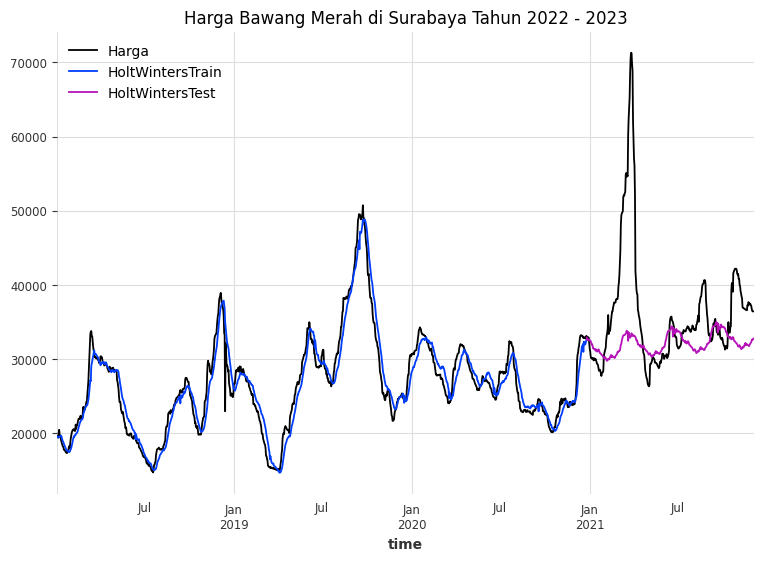

In [ ]:
#Plot the output
#We expect to see the close green line aligned to the blue line.
merah[['Harga', 'HoltWintersTrain', 'HoltWintersTest']].plot(figsize=(9, 6));
plt.title('Harga Bawang Merah di Surabaya Tahun 2022 - 2023')

plt.grid(True)
plt.legend()

In [ ]:
#Combine Train and Validation data set and apply the model
hw = ExponentialSmoothing(
    merah['Harga'],
    initialization_method='legacy-heuristic',
    trend='mul', seasonal='mul', seasonal_periods=92)
res_hw = hw.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma, method=method)
#res_hw = hw.fit()

<ipython-input-126-b317caff8d47>:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  res_hw = hw.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma, method=method)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:2234: RuntimeWarning: invalid value encountered in double_scalars
  q = (xf - fulc) * (fx - fnfc)


30 days cumulated sales: -36090.84354452146


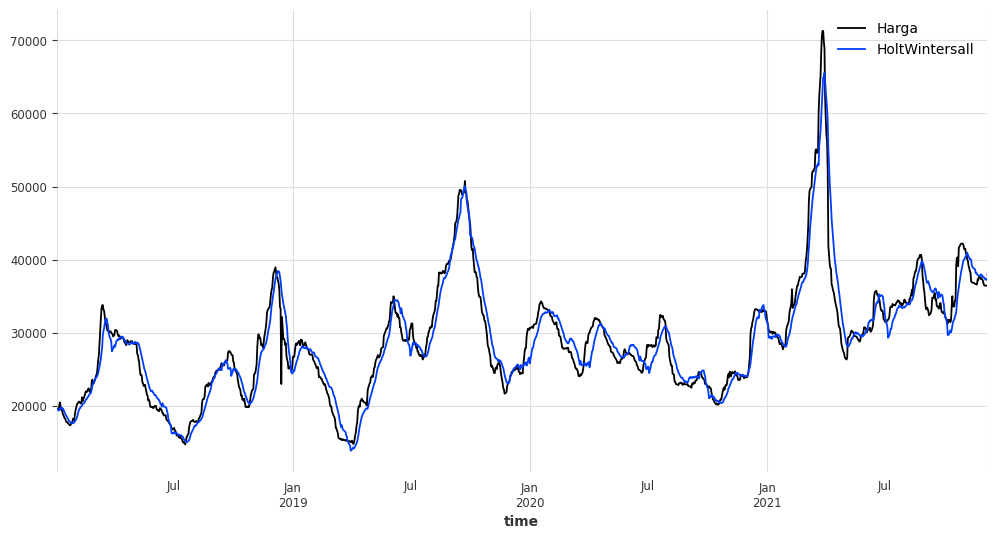

In [ ]:
#Forcasting Result
merah['HoltWintersall'] = res_hw.fittedvalues
merah[['Harga', 'HoltWintersall']].plot(figsize=(12, 6))
plt.plot(res_hw.forecast(steps=92))
list1=np.array(res_hw.forecast(steps=92))
print('30 days cumulated sales:',-list1[59])
#all Sample R-sqaured
#r2_score(merah['Harga'], res_hw.fittedvalues)

plt.grid(True)
plt.legend()

In [ ]:
print(res_hw.forecast(steps=90))

2021-12-06    37861.641592
2021-12-07    38550.829279
2021-12-08    38764.075158
2021-12-09    39282.062368
2021-12-10    39460.276294
                  ...     
2022-03-01    37665.263148
2022-03-02    37772.648060
2022-03-03    37716.021315
2022-03-04    37833.317316
2022-03-05    37782.330827
Freq: D, Length: 90, dtype: float64


# **Bawang Putih**

In [ ]:
putih = pd.read_excel('/content/Fix_Bawang Putih.xlsx')
putih

,Tanggal,Harga
0,02/ 01/ 2018,17850
1,03/ 01/ 2018,18450
2,04/ 01/ 2018,18300
3,05/ 01/ 2018,18750
4,08/ 01/ 2018,18900
...,...,...
1440,11/ 07/ 2023,38700
1441,12/ 07/ 2023,38550
1442,13/ 07/ 2023,38250
1443,14/ 07/ 2023,37950


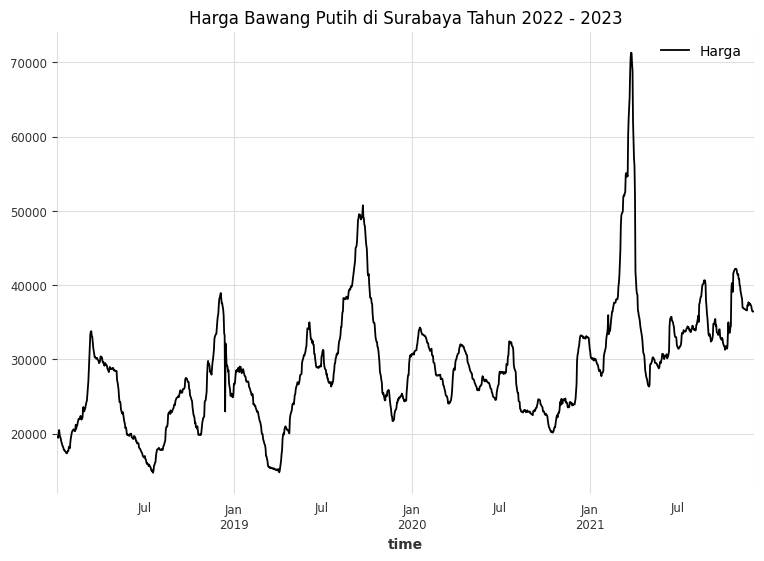

In [ ]:
#Plot the output
#We expect to see the close green line aligned to the blue line.
merah[['Harga']].plot(figsize=(9, 6));
plt.title('Harga Bawang Putih di Surabaya Tahun 2022 - 2023')

plt.grid(True)
plt.legend()

In [ ]:
print(type(putih['Harga'][0]))

<class 'numpy.int64'>


In [ ]:
print(putih['Harga'])

0       17850
1       18450
2       18300
3       18750
4       18900
        ...  
1440    38700
1441    38550
1442    38250
1443    37950
1444    37300
Name: Harga, Length: 1445, dtype: int64


In [ ]:
nobs = len(putih)
dates = pd.date_range('2018-01-02', freq = "D", periods = nobs)
putih.index = pd.Index(dates)
del putih['Tanggal']

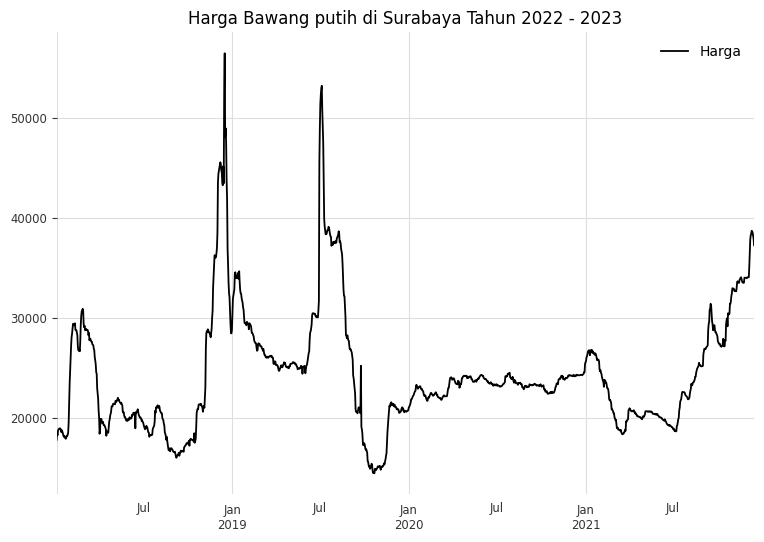

In [ ]:
#Plot the output
#We expect to see the close green line aligned to the blue line.
putih[['Harga']].plot(figsize=(9, 6));
plt.title('Harga Bawang putih di Surabaya Tahun 2022 - 2023')

plt.grid(True)
plt.legend()

In [ ]:
check_seasonality(TimeSeries.from_series(putih['Harga']), m=None, max_lag=365, alpha=0.05)

(True, 211)

In [ ]:
#Set up days of samples for test set
DayforTest = 125
train = putih.iloc[:-DayforTest]  #62.4%
test = putih.iloc[-DayforTest:]   #37,6
# boolean series to index df rows
train_idx = putih.index <= train.index[-1]
test_idx = putih.index > train.index[-1]

In [ ]:
train

,Harga,HoltWintersTrain,HoltWintersTest,HoltWintersall
time,,,,
2018-01-02,17850,18788.795098,NaN,18690.249014
2018-01-03,18450,18543.195147,NaN,18488.376573
2018-01-04,18300,18434.213062,NaN,18415.532734
2018-01-05,18750,18385.970382,NaN,18394.880977
2018-01-06,18900,18435.012944,NaN,18465.955425
...,...,...,...,...
2021-08-09,23350,23008.784890,NaN,22921.372990
2021-08-10,23300,23445.092519,NaN,23356.430444
2021-08-11,23550,23772.578306,NaN,23681.480458


In [ ]:
test

,Harga,HoltWintersTrain,HoltWintersTest,HoltWintersall
time,,,,
2021-08-14,23750,NaN,24102.226159,23959.862635
2021-08-15,23850,NaN,24230.165000,24019.039153
2021-08-16,24150,NaN,24043.005217,23831.485317
2021-08-17,24150,NaN,23997.040711,23830.929351
2021-08-18,24550,NaN,24107.821030,24016.769104
...,...,...,...,...
2021-12-12,38700,NaN,29476.298362,36679.688606
2021-12-13,38550,NaN,29164.025025,36843.728793
2021-12-14,38250,NaN,28856.317747,36912.780648


In [ ]:
#Define the model
hw = ExponentialSmoothing(
    train['Harga'],
    #initialization_method='legacy-heuristic',
    initialization_method='estimated',
    trend='mul', seasonal='mul', seasonal_periods=211)
#Hyperparameter Tuning zone
alpha = 0.2     #0.2
beta = 0.01    #0.01
gamma = 0.02   #0.02
method='Powell'
#Train the model
# smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma,
history = hw.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma, method=method) #TNC
# In-Sample prediction
#In-Sample prediction
putih.loc[train_idx, 'HoltWintersTrain'] = history.fittedvalues
#Out-of-Sample Forcasting
putih.loc[test_idx, 'HoltWintersTest'] = history.forecast(DayforTest)
print(history.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Harga   No. Observations:                 1320
Model:             ExponentialSmoothing   SSE                     2301201561.387
Optimized:                         True   AIC                          19400.129
Trend:                   Multiplicative   BIC                          20514.988
Seasonal:                Multiplicative   AICC                         19485.984
Seasonal Periods:                   211   Date:                 Sun, 23 Jul 2023
Box-Cox:                          False   Time:                         07:43:42
Box-Cox Coeff.:                    None                                         
                           coeff                 code              optimized      
----------------------------------------------------------------------------------
smoothing_level                0.2000000                alpha                False
smoothing_trend       

In [ ]:
print(mape(train['Harga'], history.fittedvalues))
print(mape(test['Harga'], history.forecast(DayforTest)))

3.4179122362898453
10.33684040902934


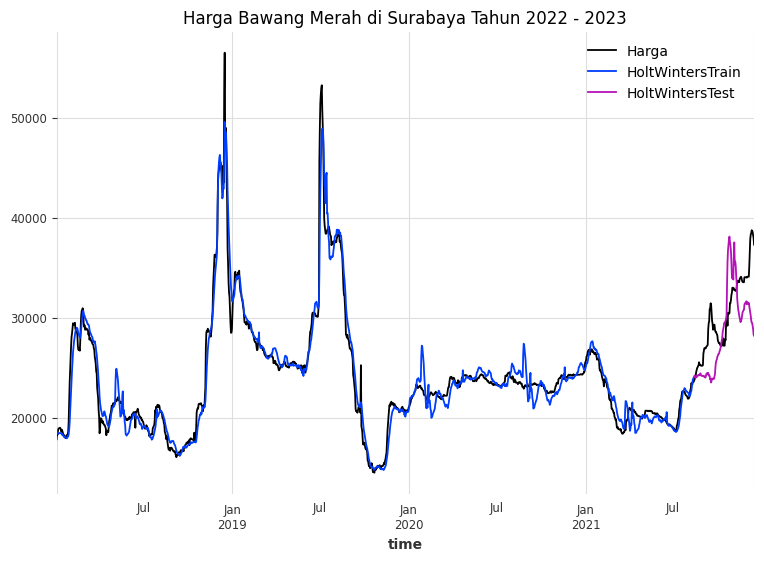

In [ ]:
#Plot the output
#We expect to see the close green line aligned to the blue line.
putih[['Harga', 'HoltWintersTrain', 'HoltWintersTest']].plot(figsize=(9, 6));
plt.title('Harga Bawang Merah di Surabaya Tahun 2022 - 2023')

plt.grid(True)
plt.legend()

In [ ]:
#Combine Train and Validation data set and apply the model
hw = ExponentialSmoothing(
    putih['Harga'],
    initialization_method='legacy-heuristic',
    trend='mul', seasonal='mul', seasonal_periods=211)
res_hw = hw.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma, method=method)
#res_hw = hw.fit()

<ipython-input-152-bb46641411bc>:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  res_hw = hw.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma, method=method)


30 days cumulated sales: -42676.201266215314


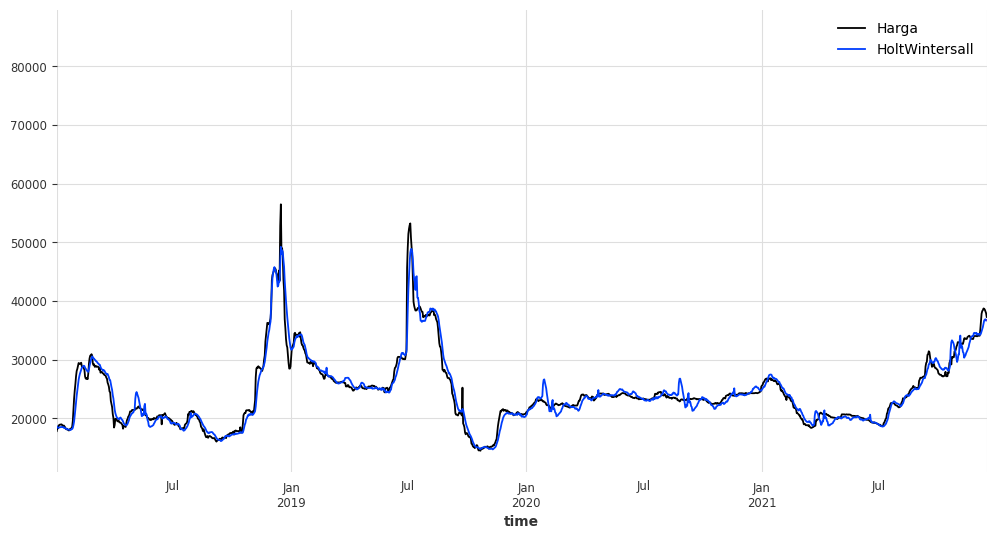

In [ ]:
#Forcasting Result
putih['HoltWintersall'] = res_hw.fittedvalues
putih[['Harga', 'HoltWintersall']].plot(figsize=(12, 6))
plt.plot(res_hw.forecast(steps=211))
list1=np.array(res_hw.forecast(steps=211))
print('30 days cumulated sales:',-list1[59])
#all Sample R-sqaured
#r2_score(putih['Harga'], res_hw.fittedvalues)

plt.grid(True)
plt.legend()

In [ ]:
print(res_hw.forecast(steps=90))

2021-12-17    36780.528049
2021-12-18    37016.139641
2021-12-19    37141.624944
2021-12-20    37229.534725
2021-12-21    37413.516383
                  ...     
2022-03-12    51366.697758
2022-03-13    51730.506459
2022-03-14    52084.797501
2022-03-15    51906.056219
2022-03-16    51899.096595
Freq: D, Length: 90, dtype: float64
